## Importing neccessary libraries or packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pandas_datareader import data
plt.style.use("fivethirtyeight")

## Extracting from Yahoo! Finance and assign to a DataFrame
* Note: The earliest available date of Bitcoin in Yahoo! Finance was Sep 16, 2014, re-execute all the cells can extract the latest dates.
 - [Re-run whole cells for trading date up-to-date and saved on 07 Mar 2021]

In [2]:
bitcoin = data.DataReader(name = "BTC-USD", data_source = "yahoo",
                          start = "2010-01-01", end = dt.today().strftime("%Y-%m-%d"))  
bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-03-03,52535.136719,48274.320312,48415.816406,50538.242188,5.322081e+10,50538.242188
2021-03-04,51735.089844,47656.929688,50522.304688,48561.167969,5.234382e+10,48561.167969
2021-03-05,49396.429688,46542.515625,48527.031250,48927.304688,4.862593e+10,48927.304688


## Visualizing the Adjusted Close Price

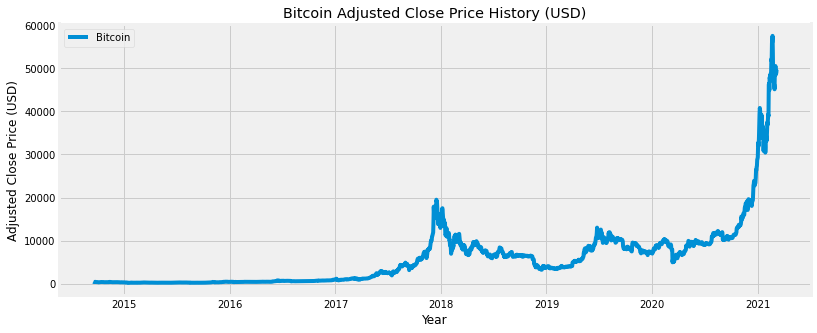

In [3]:
plt.figure(figsize = (12, 5))
plt.plot(bitcoin["Adj Close"], label = "Bitcoin")
plt.title("Bitcoin Adjusted Close Price History (USD)")
plt.xlabel("Year")  # Sep 16, 2014 - 10 Feb, 2021
plt.ylabel("Adjusted Close Price (USD)")
plt.legend(loc = "upper left")
plt.show()

## Simple Moving Average: 30-Day Average

In [4]:
sma30 = pd.DataFrame()  # Create a DF 'variable'
sma30["Adj Close"] = bitcoin["Adj Close"].rolling(window = 30).mean()
sma30

,Adj Close
Date,
2014-09-16,NaN
2014-09-17,NaN
2014-09-18,NaN
2014-09-19,NaN
2014-09-20,NaN
...,...
2021-03-03,47053.388932
2021-03-04,47488.418229
2021-03-05,47870.258724


## Simple Moving Average: 100-Day Average

In [5]:
sma100 = pd.DataFrame()
sma100["Adj Close"] = bitcoin["Adj Close"].rolling(window = 100).mean()
sma100

,Adj Close
Date,
2014-09-16,NaN
2014-09-17,NaN
2014-09-18,NaN
2014-09-19,NaN
2014-09-20,NaN
...,...
2021-03-03,33300.300957
2021-03-04,33594.837988
2021-03-05,33896.789824


## Visualizing 30-Day & 100-Day of Simple Moving Average

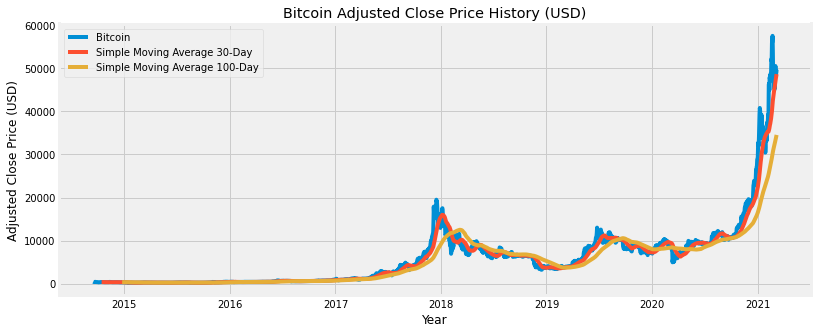

In [6]:
plt.figure(figsize = (12, 5))
plt.plot(bitcoin["Adj Close"], label = "Bitcoin")
plt.plot(sma30["Adj Close"], label = "Simple Moving Average 30-Day")
plt.plot(sma100["Adj Close"], label = "Simple Moving Average 100-Day")
plt.title("Bitcoin Adjusted Close Price History (USD)")
plt.xlabel("Year")  # Sep 16, 2014 - 10 Feb, 2021
plt.ylabel("Adjusted Close Price (USD)")
plt.legend(loc = "upper left")
plt.show()

## Basically what the strategy is telling us is that we should buy anytime the short term average crosses the long term avearge. Therefore, anytime the SMA30 crosses the SMA100, there will be a signal to buy..

## Create a new DataFrame to stored all the Adjusted Close Price of Bitcoin, SMA30 & SMA100

In [7]:
data = pd.DataFrame()
data["bitcoin"] = bitcoin["Adj Close"]
data["sma30"] = sma30["Adj Close"]
data["sma100"] = sma100["Adj Close"]
data

,bitcoin,sma30,sma100
Date,,,
2014-09-16,457.334015,NaN,NaN
2014-09-17,424.440002,NaN,NaN
2014-09-18,394.795990,NaN,NaN
2014-09-19,408.903992,NaN,NaN
2014-09-20,398.821014,NaN,NaN
...,...,...,...
2021-03-03,50538.242188,47053.388932,33300.300957
2021-03-04,48561.167969,47488.418229,33594.837988
2021-03-05,48927.304688,47870.258724,33896.789824


## Create a function to signal when to buy and sell

In [8]:
def buy_sell(data):
  signal_buy = []
  signal_sell = []
  flag = -1


  for i in range(len(data)):
    if data["sma30"][i] > data["sma100"][i]:
      if flag != 1:
        signal_buy.append(data["bitcoin"][i])
        signal_sell.append(np.nan)
        flag = 1
      else:
        signal_buy.append(np.nan)
        signal_sell.append(np.nan)
    elif data["sma30"][i] < data["sma100"][i]:
      if flag != 0:
        signal_buy.append(np.nan)
        signal_sell.append(data["bitcoin"][i])
        flag = 0
      else:
        signal_buy.append(np.nan)
        signal_sell.append(np.nan)
    else:
      signal_buy.append(np.nan)
      signal_sell.append(np.nan)

  return (signal_buy, signal_sell)

## Store the buy and sell data into a variable

In [9]:
buy_sell = buy_sell(data)

data["buy_signal_price"] = buy_sell[0]
data["sell_signal_price"] = buy_sell[1]
data

,bitcoin,sma30,sma100,buy_signal_price,sell_signal_price
Date,,,,,
2014-09-16,457.334015,NaN,NaN,NaN,NaN
2014-09-17,424.440002,NaN,NaN,NaN,NaN
2014-09-18,394.795990,NaN,NaN,NaN,NaN
2014-09-19,408.903992,NaN,NaN,NaN,NaN
2014-09-20,398.821014,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-03-03,50538.242188,47053.388932,33300.300957,NaN,NaN
2021-03-04,48561.167969,47488.418229,33594.837988,NaN,NaN
2021-03-05,48927.304688,47870.258724,33896.789824,NaN,NaN


## Visualizing the data and the strategy to buy and sell

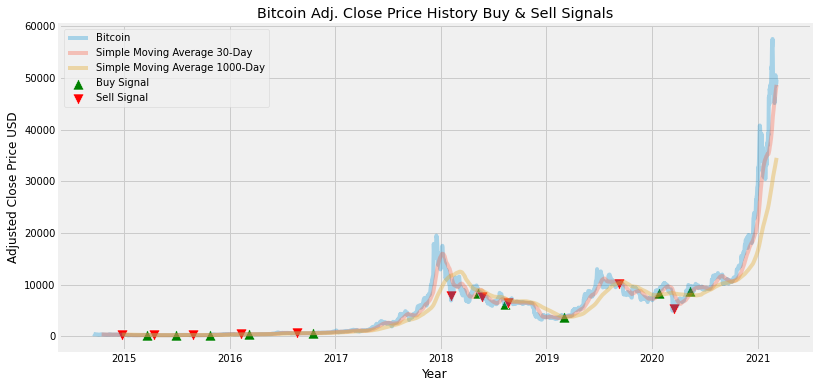

In [10]:
plt.figure(figsize = (12, 6))

plt.plot(data["bitcoin"], label = "Bitcoin", alpha = 0.3)
plt.plot(data["sma30"], label = "Simple Moving Average 30-Day", alpha = 0.3)
plt.plot(data["sma100"], label = "Simple Moving Average 1000-Day", alpha = 0.4)
plt.scatter(data.index, data["buy_signal_price"], label = "Buy Signal", marker = "^", color = "green", s = 120, ec = "white")
plt.scatter(data.index, data["sell_signal_price"], label = "Sell Signal", marker = "v", color = "red", s = 120, ec = "white")
plt.title("Bitcoin Adj. Close Price History Buy & Sell Signals")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price USD")
plt.legend(loc = "upper left")
plt.show()

## Display the dates and prices to be bought and sold

In [11]:
buy_df = pd.DataFrame()
sell_df = pd.DataFrame()
buy_df["buy_signal_price"] = data["buy_signal_price"]
sell_df["sell_signal_price"] = data["sell_signal_price"]

## Dates and Prices of Buying

In [12]:
buy_df.dropna(inplace = True)
buy_df

,buy_signal_price
Date,
2015-03-21,260.024994
2015-06-29,263.071991
2015-10-24,283.679993
2016-03-08,413.971985
2016-10-14,638.645996
2018-05-10,8441.490234
2018-08-12,6297.569824
2019-03-04,3761.557129
2020-01-25,8367.847656


## Dates and Prices of Selling

In [13]:
sell_df.dropna(inplace = True)
sell_df

,sell_signal_price
Date,
2014-12-25,319.007996
2015-04-15,228.572998
2015-08-28,229.779999
2016-02-08,373.446991
2016-08-20,581.307983
2018-02-06,7754.000000
2018-05-23,7587.339844
2018-08-21,6376.709961
2019-09-10,10178.372070
